# Importing Required libarary

In [114]:
# !pip install mlxtend


INFO: pip is looking at multiple versions of mlxtend to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.7 MB/s  0:00:00


In [115]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [95]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [97]:
# df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})abs

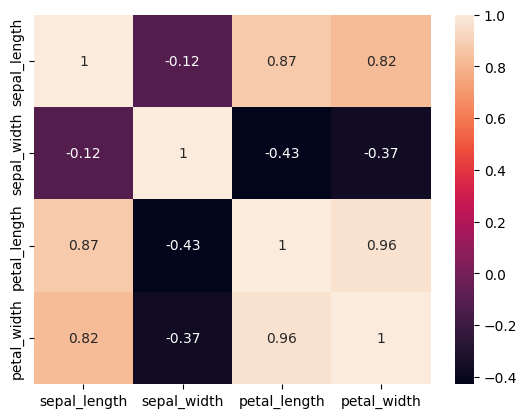

In [98]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [99]:
le = LabelEncoder()

In [100]:
df['species'] = le.fit_transform(df['species'])


In [101]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [145]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]



In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
lr= LogisticRegression(multi_class='multinomial')

In [151]:
lr.fit(x_train,y_train)

C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [152]:
y_pred_test = lr.predict(x_test)

In [156]:
print(f"your accuracy on iris using multinomial is {accuracy_score(y_pred_test,y_test)}")

your accuracy on iris using multinomial is 1.0


In [157]:
# svm = SVC()
# svm.fit(x_train,y_train)
# y_pred_test_svc= svm.predict(x_test)
# accuracy_score(y_pred_test_svc,y_test)

# The plot only support 2 features so I am gonna use only 2 just so that i can visualize the boundary of Logistic Regression

In [174]:
X = df[['sepal_length','petal_length']]
Y = le.fit_transform(df['species'])

In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)
X_train

,sepal_length,petal_length
22,4.6,1.0
15,5.7,1.5
65,6.7,4.4
11,4.8,1.6
42,4.4,1.3
...,...,...
71,6.1,4.0
106,4.9,4.5
14,5.8,1.2
92,5.8,4.0


In [176]:
lr2 = LogisticRegression(multi_class='multinomial')


In [177]:
lr2.fit(X_train,Y_train)

C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [178]:
y_pred_test_lr2 = lr2.predict(X_test)

C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


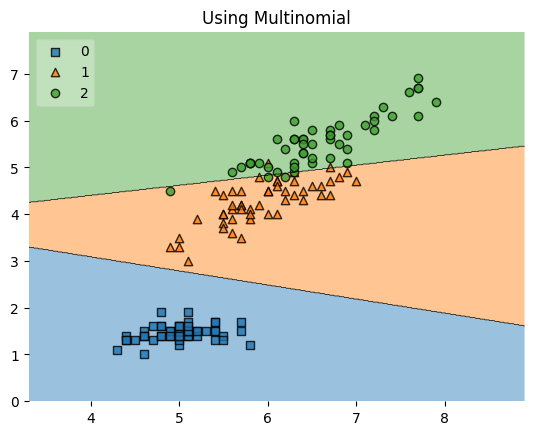

In [181]:
plot_decision_regions(X.values,y.values,lr2,legend=2);
plt.title("Using Multinomial");

In [182]:
print(f"your accuracy on iris using multinomial is {accuracy_score(y_pred_test_lr2,Y_test)}")

your accuracy on iris using multinomial is 1.0
